#Here we determine if we have the suitable version of tensorflow for our purpose


In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


#Now we make the setup to be able to download the dataset from Kaggle into our workspace - you will have to upload the kaggle.json file that you can download from your kaggle account

In [2]:
!pip install -q kaggle # to downlaod the dataset

In [3]:
from google.colab import files
files.upload()
print('Uploaded kaggle.json')

Saving kaggle.json to kaggle.json
Uploaded kaggle.json


Now we move the kaggle.json file to kaggle folder and provide chmod permissions

In [4]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#Make the directory where we store our data

In [5]:
!mkdir /content/Weather

In [6]:
!ls

sample_data  Weather


In [7]:
%%bash
cd /content/Weather
kaggle datasets download -d jehanbhathena/weather-dataset -p . --unzip

100%|██████████| 587M/587M [00:04<00:00, 139MB/s]


In [8]:
dataPath = '/content/Weather/dataset'

#Now we import the necessary modules, classes and functions

In [9]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.resnet50 import ResNet50 as PreTrainedModel
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam

from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

#Here we provide a visual of the types of classes we have in this weather dataset

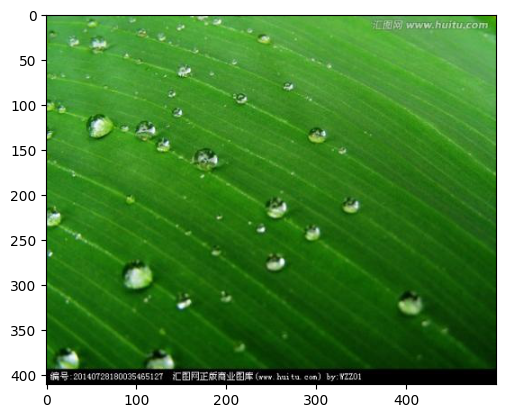

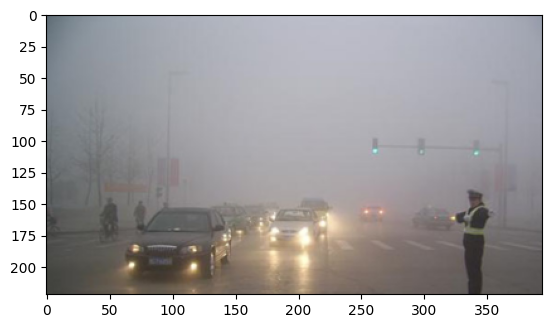

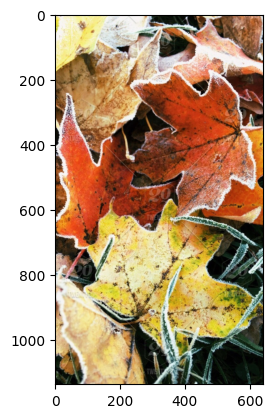

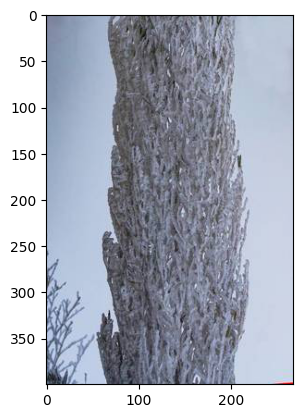

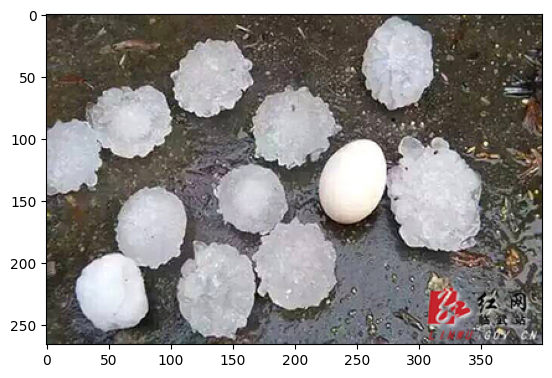

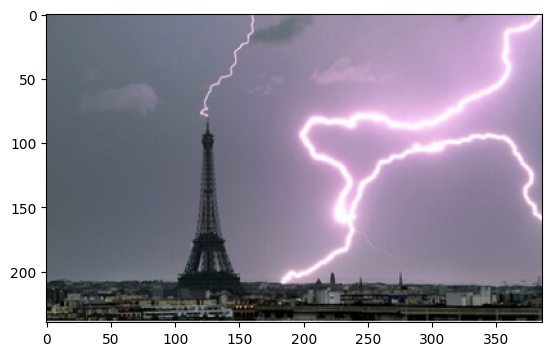

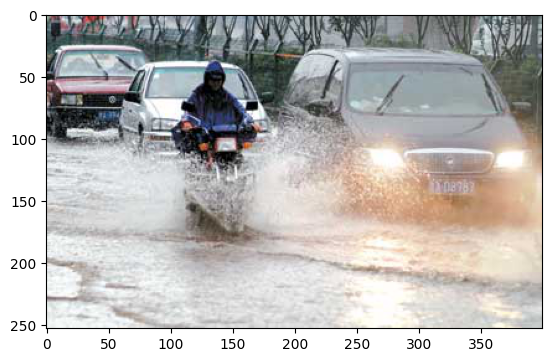

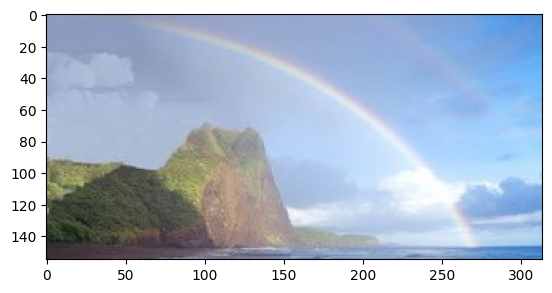

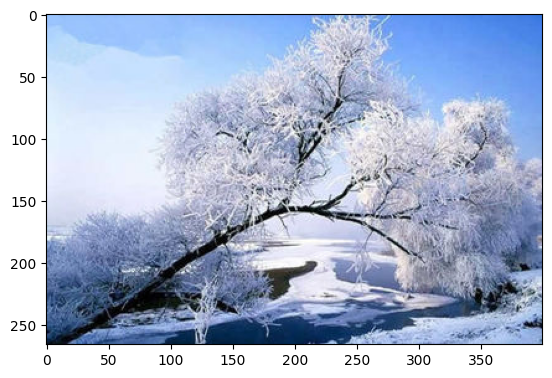

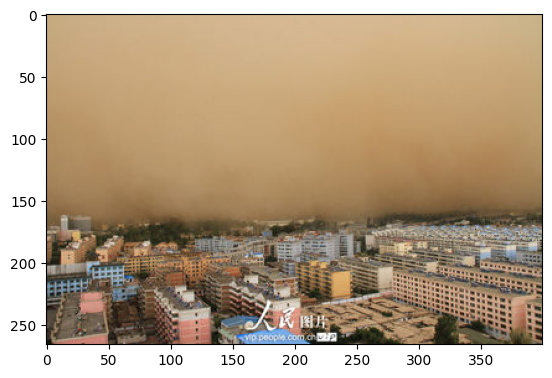

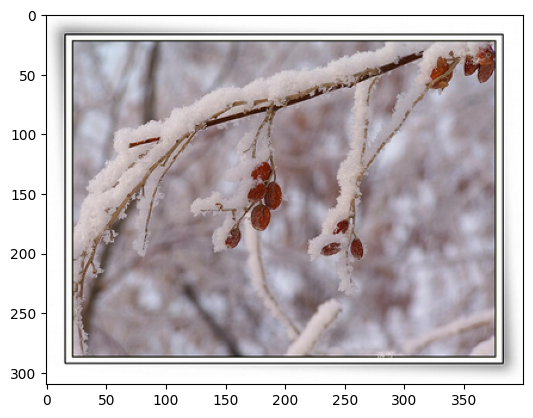

In [10]:
plt.imshow(image.load_img('/content/Weather/dataset/dew/2213.jpg'))
plt.show()
plt.imshow(image.load_img('/content/Weather/dataset/fogsmog/4078.jpg'))
plt.show()
plt.imshow(image.load_img('/content/Weather/dataset/frost/3604.jpg'))
plt.show()
plt.imshow(image.load_img('/content/Weather/dataset/glaze/6092.jpg'))
plt.show()
plt.imshow(image.load_img('/content/Weather/dataset/hail/0007.jpg'))
plt.show()
plt.imshow(image.load_img('/content/Weather/dataset/lightning/1837.jpg'))
plt.show()
plt.imshow(image.load_img('/content/Weather/dataset/rain/103.jpg'))
plt.show()
plt.imshow(image.load_img('/content/Weather/dataset/rainbow/0600.jpg'))
plt.show()
plt.imshow(image.load_img('/content/Weather/dataset/rime/4947.jpg'))
plt.show()
plt.imshow(image.load_img('/content/Weather/dataset/sandstorm/2915.jpg'))
plt.show()
plt.imshow(image.load_img('/content/Weather/dataset/snow/0851.jpg'))
plt.show()

#Defining the model and it's parameters

In [11]:
image_size = [250,250]
k = len(glob(dataPath + '/*'))
k

11

In [12]:
ptm = PreTrainedModel(include_top = False,weights = 'imagenet', input_shape = image_size + [3])
ptm.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [13]:
x = Flatten()(ptm.output)
x = Dense(128, activation = tf.keras.layers.LeakyReLU(alpha=0.01))(x)
x = Dropout(0.2)(x)
x = Dense(256, activation = tf.keras.layers.LeakyReLU(alpha=0.01))(x)
x = Dropout(0.2)(x)
x = Dense(k, activation = 'softmax')(x)

In [14]:
model = tf.keras.Model(inputs = ptm.input, outputs = x)

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 125, 125, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [16]:
batch_size = 80
gen = ImageDataGenerator(rotation_range = 12, width_shift_range = 0.1, height_shift_range = 0.1, shear_range = 0.1, zoom_range = 0.5, horizontal_flip = True, vertical_flip = True, validation_split = 0.2)

In [17]:
train_data_gen = gen.flow_from_directory(dataPath, shuffle = True,target_size = image_size,batch_size = batch_size, subset = 'training')
test_data_gen = gen.flow_from_directory(dataPath, target_size = image_size,batch_size = batch_size, subset = 'validation')


Found 5493 images belonging to 11 classes.
Found 1369 images belonging to 11 classes.


In [18]:
learningRate = 0.0002
model.compile(optimizer = Adam(learning_rate = learningRate), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
checkpoint_path = "/content/Weathermodel.h5"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)

#Training the model

In [21]:
r = model.fit(train_data_gen, validation_data = test_data_gen,epochs = 15, steps_per_epoch = int(np.ceil(5493/ batch_size)), validation_steps = int(np.ceil(1369/batch_size)), callbacks = [cp_callback])

Epoch 1/15
69/69 [==============================] - ETA: 0s - loss: 0.7857 - accuracy: 0.7490 
Epoch 1: saving model to /content/Weathermodel.h5
69/69 [==============================] - 1198s 17s/step - loss: 0.7857 - accuracy: 0.7490
Epoch 2/15
69/69 [==============================] - ETA: 0s - loss: 0.7147 - accuracy: 0.7673 
Epoch 2: saving model to /content/Weathermodel.h5
69/69 [==============================] - 1174s 17s/step - loss: 0.7147 - accuracy: 0.7673
Epoch 3/15
69/69 [==============================] - ETA: 0s - loss: 0.6788 - accuracy: 0.7815 
Epoch 3: saving model to /content/Weathermodel.h5
69/69 [==============================] - 1177s 17s/step - loss: 0.6788 - accuracy: 0.7815
Epoch 4/15
69/69 [==============================] - ETA: 0s - loss: 0.6345 - accuracy: 0.7941 
Epoch 4: saving model to /content/Weathermodel.h5
69/69 [==============================] - 1156s 17s/step - loss: 0.6345 - accuracy: 0.7941
Epoch 5/15
69/69 [==============================] - ETA: 0s 

In [22]:
files.download('/content/Weathermodel.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Fine tuning the model

In [12]:
ptm = PreTrainedModel(include_top = False,weights = 'imagenet', input_shape = image_size + [3])

94765736/94765736 [==============================] - 1s 0us/step


In [13]:
len(ptm.layers)

175

In [14]:
fine_tune_at = 140
for layer in ptm.layers[:fine_tune_at]:
  layer.trainable = False
for layer in ptm.layers[fine_tune_at:]:
  layer.trainable = True

In [15]:
x = Flatten()(ptm.output)
x = Dense(128, activation = tf.keras.layers.LeakyReLU(alpha=0.01))(x)
x = Dropout(0.2)(x)
x = Dense(256, activation = tf.keras.layers.LeakyReLU(alpha=0.01))(x)
x = Dropout(0.2)(x)
x = Dense(k, activation = 'softmax')(x)

In [16]:
model = tf.keras.Model(inputs = ptm.input, outputs = x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 125, 125, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [17]:
batch_size = 80
gen = ImageDataGenerator(rotation_range = 12, width_shift_range = 0.1, height_shift_range = 0.1, shear_range = 0.1, zoom_range = 0.5, horizontal_flip = True, vertical_flip = True, validation_split = 0.2)

In [18]:
train_data_gen = gen.flow_from_directory(dataPath, shuffle = True,target_size = image_size,batch_size = batch_size, subset = 'training')
test_data_gen = gen.flow_from_directory(dataPath, target_size = image_size,batch_size = batch_size, subset = 'validation')

Found 5493 images belonging to 11 classes.
Found 1369 images belonging to 11 classes.


In [19]:
learningRate = 0.0002
model.load_weights('Weathermodel.h5')
model.compile(optimizer = Adam(learning_rate = learningRate), loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [21]:
r = model.fit(train_data_gen, validation_data = test_data_gen,epochs = 7, steps_per_epoch = int(np.ceil(5493/ batch_size)))

Epoch 1/7
69/69 [==============================] - 2387s 35s/step - loss: 0.6595 - accuracy: 0.8072 - val_loss: 0.9831 - val_accuracy: 0.7889
Epoch 2/7
69/69 [==============================] - 2374s 34s/step - loss: 0.4852 - accuracy: 0.8442 - val_loss: 0.7335 - val_accuracy: 0.8247
Epoch 3/7
69/69 [==============================] - 2389s 35s/step - loss: 0.4852 - accuracy: 0.8649 - val_loss: 0.6211 - val_accuracy: 0.8291
Epoch 4/7
69/69 [==============================] - 2288s 33s/step - loss: 0.3991 - accuracy: 0.8782 - val_loss: 0.6414 - val_accuracy: 0.8524
Epoch 5/7
69/69 [==============================] - 2257s 33s/step - loss: 0.3789 - accuracy: 0.8877 - val_loss: 0.6250 - val_accuracy: 0.8430
Epoch 6/7
69/69 [==============================] - 2252s 33s/step - loss: 0.4036 - accuracy: 0.8879 - val_loss: 0.5825 - val_accuracy: 0.8561
Epoch 7/7
69/69 [==============================] - 2256s 33s/step - loss: 0.3033 - accuracy: 0.9053 - val_loss: 0.5715 - val_accuracy: 0.8561


In [22]:
model.save_weights('/content/Weathermodel_final.h5')

In [23]:
files.download('/content/Weathermodel_final.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

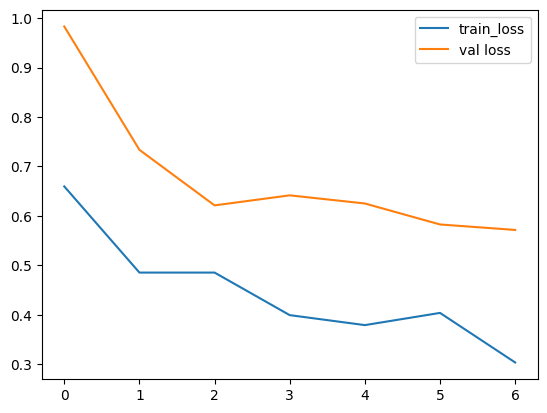

In [24]:
plt.plot(r.history['loss'],label = 'train_loss')
plt.plot(r.history['val_loss'],label = 'val loss')
plt.legend()
plt.show()

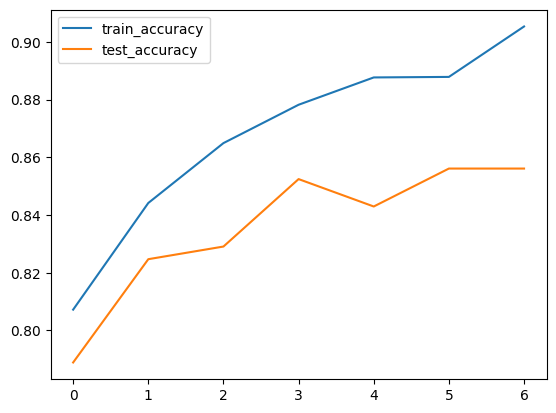

In [25]:
plt.plot(r.history['accuracy'],label = 'train_accuracy')
plt.plot(r.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

#Documentation

Here we see that the model accuracy improved after un-freezing a few layers of the model so as to ensure that the top layers of the ResNet-50 model is conditioned on learning the features as seen in the dataset. As can be seen this architecture has achieved better accuracy than the one given in - https://www.kaggle.com/code/dhouibakram/weather-classification

Some potential applications of the same are:
1. Applications in Autonomous Vehicles to determine the viability of using the vehicle in autonomous mode since some vehicles cannot be deployed in situations of heavy rain since sensors such as LiDAR and GPS may be rendered useless.

2. Astronomical applications to determine if weather is feasible for making Astronomical observations.

3. Deploying safety systems in scenarios of weather situations that may be harmful to people such as hailstorms which pose potential risk by posing a lethal risk on people who it falls on or fogsmog that can pose visibility issues.